#Futura Ganadera

#Abstrac

##Descripción del dataset
El dataset cuenta con información de los movimientos de ganado en Argentina. Los tipos de animales que se encuentran en el son:

* Vaca: Es una hembra bovina adulta que ha parido al menos una vez. Se cría principalmente para la producción de leche y carne.

* Vaquillona: Es una hembra bovina joven que aún no ha parido, generalmente entre uno y dos años de edad.

* Novillo: Es un macho bovino joven castrado, destinado principalmente a la producción de carne. Su edad suele estar entre uno y tres años.

* Novillito: Es un macho bovino joven castrado, de menor edad que el novillo, generalmente entre uno y dos años. También se destina a la producción de carne, pero suele tener un menor peso al faena.

* Ternero: Es una cría bovina macho o hembra desde su nacimiento hasta el destete, que suele ocurrir alrededor de los seis a ocho meses de edad.

* Ternera: Es una cría bovina hembra desde su nacimiento hasta el destete.

* Torito: Es un macho bovino joven, generalmente menor de tres años, que aún no se utiliza para la reproducción de manera extensiva.

* Toro: Es un macho bovino adulto y no castrado, utilizado para la reproducción.

* Bueyes: Son machos bovinos castrados y adultos, que tradicionalmente se utilizaban para trabajos de tiro y arado.

En este proyecto nos enfocaremos en estudiar los animales que se utilizan para producción carnica novillo y novillito. También se decidió incluir a ternero en este estudio ya presenta ciertas probabilidaes de ser utilizado en la producción carnica.

##Objetivo
Aplicar algoritmos de clustering para identificar y caracterizar regiones con patrones de compra y venta similares de terneros y novillitos, con el fin de proporcionar información valiosa para la toma de decisiones en el mercado ganadero.

##Preguntas hipótesis
* ¿Existen grupos de regiones con patrones de compra y venta de terneros y novillitos claramente definidos?.
* ¿Qué características definen a cada grupo de regiones? (Por ejemplo, volumen de compra/venta, estacionalidad, origen/destino del ganado).
* ¿Qué factores geográficos  influyen en la formación de estos grupos?.
* ¿Cómo varían los patrones de compra y venta a en las diferentes estaciones del año?.
* ¿Existen regiones que actúan como "centros de distribución" de terneros y novillitos? (Por ejemplo, Buenos Aires o Córdoba).


#Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.cluster import KMeans

#Carga del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/movimiento-bovinos-2018.csv'
df = pd.read_csv(ruta_dataset, encoding='latin-1')
df.head()

,fecha,salido_de,ingresado_a,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
0,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,212,150,0,342,931,566,0,21,0
1,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,35,0,0,0,96,104,0,4,0
2,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,0,0,31,9,0,0,0
3,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,0,0,29,39,0,0,0
4,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,0,0,11,14,0,0,0


#EDA

In [ ]:
print("Tamaño de mi dataset:", df.shape)

Tamaño de mi dataset: (168802, 20)


In [ ]:
df.tail()

,fecha,salido_de,ingresado_a,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
168797,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Santa Fe,82,Vera,82133,0,37,0,0,0,0,26,0,0
168798,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Santiago del Estero,86,Robles,86161,92,176,19,1,0,0,2,12,0
168799,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Capital,90084,0,7,0,13,0,0,0,0,0
168800,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Leales,90056,25,20,0,12,0,0,8,0,0
168801,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Lules,90063,0,0,0,14,0,0,0,0,0


Visualizamos la información general del dataset.
* A primera vista parecería que no hay valores nulos.
* Variables más importantes: provicia de origen, provincia de destino, salido de, ingresado a, novillo, novillito y ternero.
* Hay columnas que muy posiblemente no se sean necesarias para ayudarnos a resolver el objetivo principal de nuestro problema: ternera, torito, toro y bueyes.
* Vaca y vaquillona hay que estudiar más a fondo la relación con nuestras variables de interes.
* En el caso de las variables departamento podrían eliminarse para este primer modelo y solo tener en cuenta la provincias.

##Valores Nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168802 entries, 0 to 168801
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   fecha                    168802 non-null  object
 1   salido_de                168802 non-null  object
 2   ingresado_a              168802 non-null  object
 3   provincia_origen         168802 non-null  object
 4   provincia_origen_id      168802 non-null  int64 
 5   departamento_origen      168802 non-null  object
 6   departamento_origen_id   168802 non-null  int64 
 7   provincia_destino        168802 non-null  object
 8   provincia_destino_id     168802 non-null  int64 
 9   departamento_destino     168802 non-null  object
 10  departamento_destino_id  168802 non-null  int64 
 11  vaca                     168802 non-null  int64 
 12  vaquillona               168802 non-null  int64 
 13  novillo                  168802 non-null  int64 
 14  novillito           

In [ ]:
df.isnull().sum()

,0
fecha,0
salido_de,0
ingresado_a,0
provincia_origen,0
provincia_origen_id,0
departamento_origen,0
departamento_origen_id,0
provincia_destino,0
provincia_destino_id,0
departamento_destino,0


##Exploración de los datos

In [ ]:
df.dtypes

,0
fecha,object
salido_de,object
ingresado_a,object
provincia_origen,object
provincia_origen_id,int64
departamento_origen,object
departamento_origen_id,int64
provincia_destino,object
provincia_destino_id,int64
departamento_destino,object


Vamos a realizar un vista general de los valores estadisticos de las variables numericas.

* Posible solución: luego de eliminar las variables que no son de interes eliminar las filas dinde novillo, novillito y ternero tienen valores cero.

In [ ]:
df.describe()

,provincia_origen_id,departamento_origen_id,provincia_destino_id,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
count,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000
mean,27.445125,27658.608666,29.831021,30064.051291,42.388337,35.813823,26.340950,37.402928,42.617516,33.294819,1.282023,3.313681,0.002927
std,26.857114,26744.951837,29.547682,29416.051202,156.953718,132.454762,118.959993,147.214797,147.858749,125.992010,12.434034,15.230203,0.662959
min,2.000000,2000.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6511.000000,6.000000,6539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,14168.000000,14.000000,14119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,42056.000000,50.000000,50049.000000,32.000000,27.000000,8.000000,26.000000,33.000000,23.000000,0.000000,1.000000,0.000000
max,94.000000,94015.000000,94.000000,94015.000000,10027.000000,8242.000000,5960.000000,8264.000000,6583.000000,6970.000000,1075.000000,1170.000000,262.000000


In [ ]:
df.isnull().sum()

,0
fecha,0
salido_de,0
ingresado_a,0
provincia_origen,0
provincia_origen_id,0
departamento_origen,0
departamento_origen_id,0
provincia_destino,0
provincia_destino_id,0
departamento_destino,0


Los valores de la variables salido_de  e ingresado_a tienen valores correctos.

In [ ]:
df.salido_de.value_counts()

,count
salido_de,
Establecimiento,137813
Remate feria,30984
Puesto de frontera,5


In [ ]:
df.ingresado_a.value_counts()

,count
ingresado_a,
Establecimiento,91245
Frigorífico,62294
Remate feria,15263


Control de los valores de la variable relacionadas a los departamentos.

In [ ]:
df.departamento_origen.value_counts()

,count
departamento_origen,
9 de Julio,2076
San Justo,1972
Ayacucho,1929
Coronel Pringles,1749
Capital,1727
...,...
Humahuaca,1
Zonda,1
Santa Lucía,1


In [ ]:
df.departamento_destino.value_counts()

,count
departamento_destino,
Capital,3695
Rosario,3440
Caseros,2349
Río Cuarto,2321
General López,2147
...,...
Tilcara,2
Ullum,1
Santa Lucía,1


Control de los valores de las variables provicia_origen y provincia_destino

In [ ]:
df.provincia_origen.value_counts()

,count
provincia_origen,
Buenos Aires,67861
Córdoba,16748
Santa Fe,14253
Entre Ríos,12527
La Pampa,11769
Corrientes,10819
Chaco,9505
Santiago del Estero,5267
San Luis,4508


In [ ]:
df.provincia_destino.value_counts()

,count
provincia_destino,
Buenos Aires,69288
Santa Fe,21052
Córdoba,17716
La Pampa,9358
Entre Ríos,9154
Chaco,7298
Corrientes,5302
Santiago del Estero,4803
San Luis,3698


Identificamos a que valor de provicia_origen_id pertenece cada provincia de origen. Analizamos la cantidad de movimientos en cada una de ellas.

In [ ]:
df.groupby(['provincia_origen_id', 'provincia_origen']).size().reset_index(name='cantidad_movimientos').set_index('provincia_origen_id').sort_values('cantidad_movimientos', ascending=False)

,provincia_origen,cantidad_movimientos
provincia_origen_id,,
6,Buenos Aires,67861
14,Córdoba,16748
82,Santa Fe,14253
30,Entre Ríos,12527
42,La Pampa,11769
18,Corrientes,10819
22,Chaco,9505
86,Santiago del Estero,5267
74,San Luis,4508


Identificamos a que valor de provicia_destino_id pertenece cada provincia de destino. Analizamos la cantidad de movimientos en cada una de ellas.

In [ ]:
df.groupby(['provincia_destino_id', 'provincia_destino']).size().reset_index(name='cantidad_movimientos').set_index('provincia_destino_id').sort_values('cantidad_movimientos', ascending=False)

,provincia_destino,cantidad_movimientos
provincia_destino_id,,
6,Buenos Aires,69288
82,Santa Fe,21052
14,Córdoba,17716
42,La Pampa,9358
30,Entre Ríos,9154
22,Chaco,7298
18,Corrientes,5302
86,Santiago del Estero,4803
74,San Luis,3698


#Limpieza y Preprocesamiento

##Eliminación y Transformación de variables

La columna fecha es tipo object por lo tanto vamos a datatime

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])

Para mejorar el entendimiento del dataset se van a cambiar los nombres de las variables salidos_ ingresa_a por origen y detino.

In [ ]:
df = df.rename(columns={'salido_de': 'origen', 'ingresado_a': 'destino'})
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
0,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,212,150,0,342,931,566,0,21,0
1,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,35,0,0,0,96,104,0,4,0
2,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,0,0,31,9,0,0,0
3,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,0,0,29,39,0,0,0
4,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,0,0,11,14,0,0,0


Se decidió eliminar las variables relacionadas a los departamentos ya que solo se estudiará los movimientos a nivel provincia.

In [ ]:
df = df.drop(["departamento_origen", "departamento_origen_id", "departamento_destino", "departamento_destino_id"], axis = 1)

df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
0,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,212,150,0,342,931,566,0,21,0
1,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,35,0,0,0,96,104,0,4,0
2,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,0,0,31,9,0,0,0
3,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,0,0,29,39,0,0,0
4,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,0,0,11,14,0,0,0


Como solos nos interes estudiar los movimientos de novillo, novillito y ternero, eliminaremos el resto de variables que esten relacionadas a este tipo de animal

In [ ]:
columnas_a_eliminar = ["vaca", "vaquilla", "vaquillona", "ternera", "torito", "toro", "bueyes"]
df = df.drop(columns=columnas_a_eliminar, errors="ignore")


In [ ]:
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillo,novillito,ternero
0,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,342,931
1,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,96
2,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,31
3,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,29
4,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,11


Eliminamos los valores donde las tres variables de interes tienen valor cero las tres al mismo tiempo.

In [ ]:
df = df[~((df["ternero"] == 0) & (df["novillo"] == 0) & (df["novillito"] == 0))]
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillo,novillito,ternero
0,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,342,931
1,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,96
2,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,31
3,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,29
4,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,0,0,11


Tamaño final del dataset

In [ ]:
print("Tamaño actualizado de mi dataset:", df.shape)

Tamaño actualizado de mi dataset: (127034, 10)


##Division de dataset resultantes


In [ ]:
# Dataset solo con novillos (eliminar columnas que no son necesarias)
df_novillo = df[df['novillo'] > 0][['fecha','origen','destino','provincia_origen','provincia_origen_id','provincia_destino','provincia_destino_id','novillo']].copy()

# Dataset solo con novillitos
df_novillito = df[df['novillito'] > 0][['fecha','origen','destino','provincia_origen','provincia_origen_id','provincia_destino','provincia_destino_id','novillito']].copy()

# Dataset solo con terneros
df_ternero = df[df['ternero'] > 0][['fecha','origen','destino','provincia_origen','provincia_origen_id','provincia_destino','provincia_destino_id','ternero']].copy()

df_novillito.head()
df_novillo.head()
df_ternero.head()


,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,ternero
0,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,931
1,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,96
2,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,31
3,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,29
4,2018-01-01,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,11


In [ ]:
# df_novillo.to_csv('novillo.csv', index=False)
# files.download('novillo.csv')

# df_novillito.to_csv('novillito.csv', index=False)
# files.download('novillito.csv')

# df_ternero.to_csv('ternero.csv', index=False)
# files.download('ternero.csv')

#Novillo

##Carga del dataset

In [ ]:
ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/novillo.csv'
df_novillo = pd.read_csv(ruta_dataset, encoding='utf-8')
df_novillo.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillo
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,36
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,126
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,106
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,726
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,1


##Analisis de la distribución de la variable Novillo

In [ ]:
df_novillo['novillo'].describe()

,novillo
count,54911.000000
mean,80.974759
std,197.685567
min,1.000000
25%,9.000000
50%,29.000000
75%,73.000000
max,5960.000000


CV > 1: Indica una
alta variabilidad relativa.
Los datos están
bastante dispersos en
comparación con la
media.

In [ ]:
cv = df_novillo['novillo'].std() / df_novillo['novillo'].mean()
print(f'Coeficiente de variación: {cv:.2f}')


Coeficiente de variación: 2.44


In [ ]:
Q1 = df_novillo['novillo'].quantile(0.25)
Q3 = df_novillo['novillo'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_novillo[(df_novillo['novillo'] < Q1 - 1.5 * IQR) | (df_novillo['novillo'] > Q3 + 1.5 * IQR)]
print(f'Total de outliers: {outliers.shape[0]}')


Total de outliers: 6190


In [ ]:
asimetria = df_novillo['novillo'].skew()
print(f'Asimetría: {asimetria:.2f}')

Asimetría: 10.08


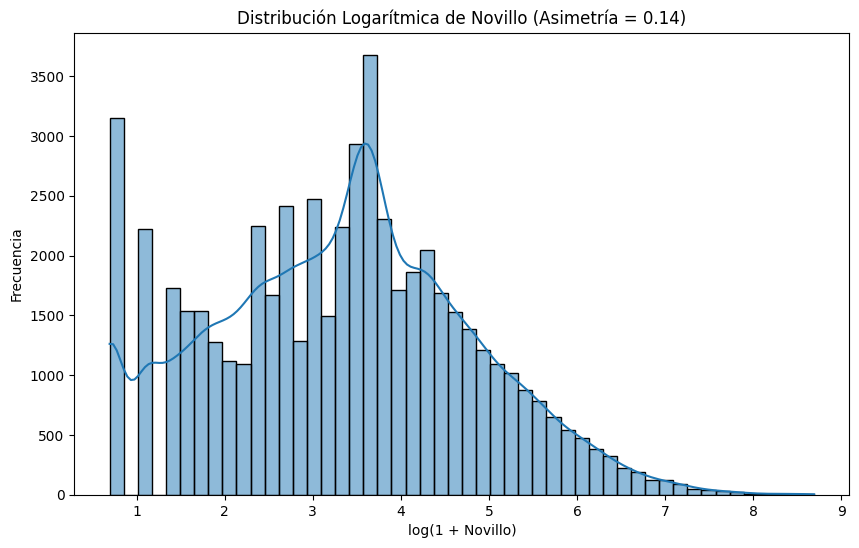

In [ ]:
df_novillo['log_novillo'] = np.log1p(df_novillo['novillo'])
asimetria_log = df_novillo['log_novillo'].skew()
plt.figure(figsize=(10,6))
sns.histplot(df_novillo['log_novillo'], kde=True, bins=50)
plt.title(f'Distribución Logarítmica de Novillo (Asimetría = {asimetria_log:.2f})')
plt.xlabel('log(1 + Novillo)')
plt.ylabel('Frecuencia')
plt.show()


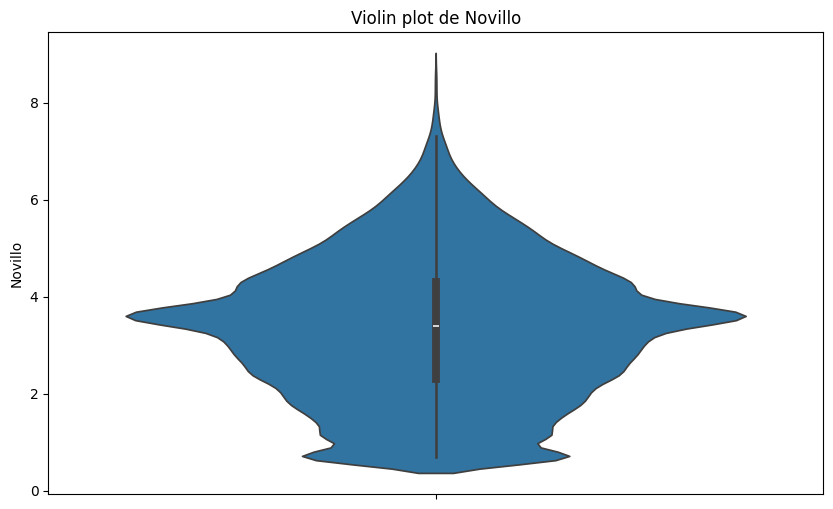

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='log_novillo', data=df_novillo)
plt.title('Violin plot de Novillo')
plt.ylabel('Novillo')
plt.show()


In [ ]:
df_novillo.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillo,log_novillo
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,36,3.610918
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,126,4.844187
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,106,4.672829
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,726,6.588926
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,1,0.693147


Observaciones

*El hecho de que la media (80) esté muy por encima de la mediana (29) indica que hay una gran asimetría positiva (hacia la derecha).

*El coeficiente de variación (std / media = 2.44) confirma que hay alta dispersión relativa.

*El número de outliers (6190) es importante: alrededor del 11% del total (54911 registros).


Al momento de aplicar modelos de machine learning se utilizará la transformación logaritmica.

##Análisis Gráfico

###Analisis de la distribución de la variable novillo con respecto a las provicias de origen y destino.

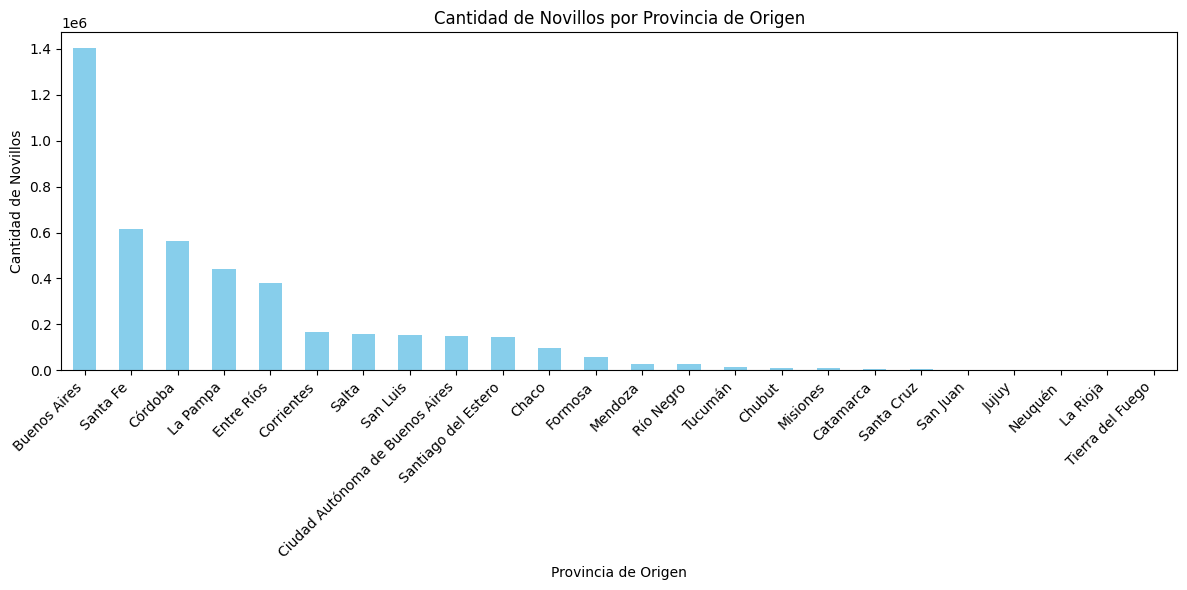

In [ ]:
novillo_por_provincia = df_novillo.groupby('provincia_origen')['novillo'].sum()
novillo_por_provincia = novillo_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
novillo_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Novillos por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Novillos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

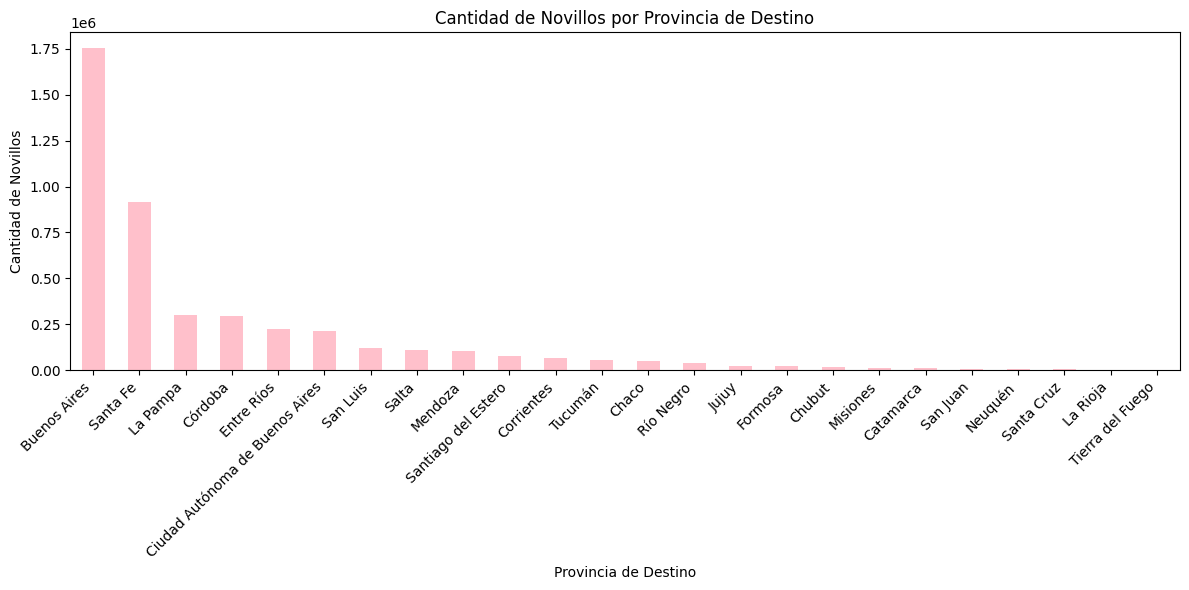

In [ ]:
novillo_por_provincia = df_novillo.groupby('provincia_destino')['novillo'].sum()
novillo_por_provincia = novillo_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
novillo_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Novillos por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Novillos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Analisis de la distribución de la variable novillo con respecto al origen y el destino

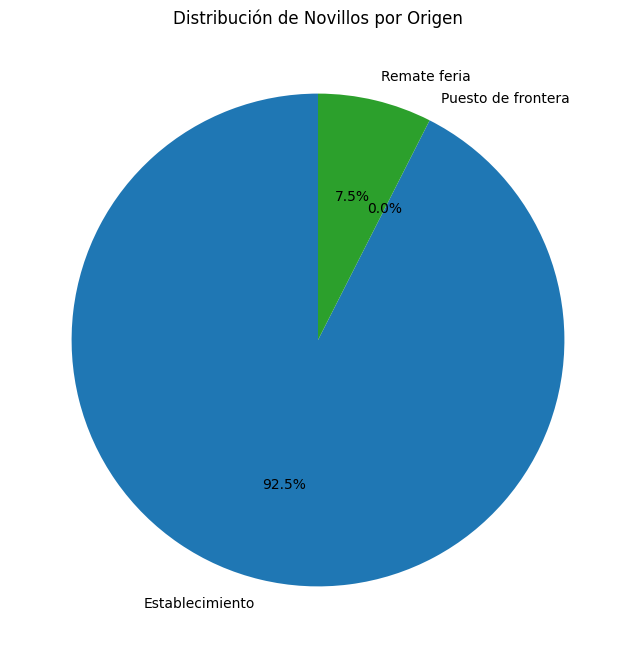

In [ ]:
origen_novillo = df.groupby("origen")["novillo"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillo, labels=origen_novillo.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillos por Origen")
plt.show()

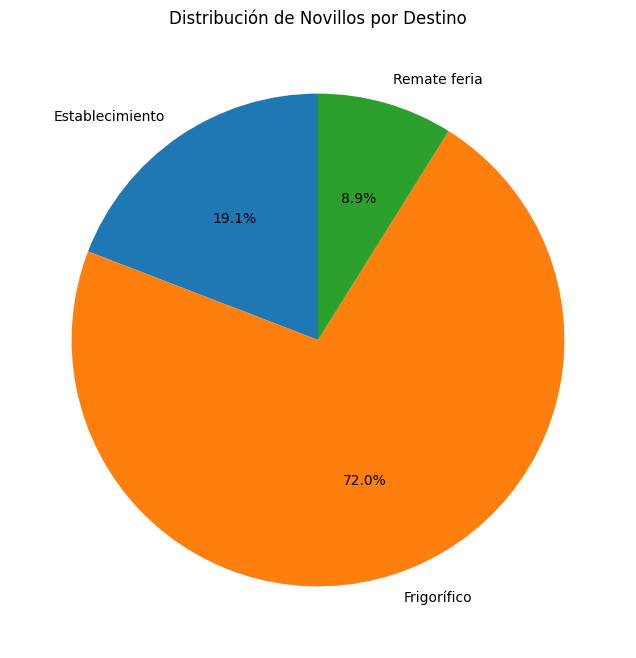

In [ ]:
origen_novillo = df_novillo.groupby("destino")["novillo"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillo, labels=origen_novillo.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillos por Destino")
plt.show()

El 92% de los novillos provienen de un establecimiento y el resto de los remates. Pero en este caso el 72% tiene como destino el frigorifico, el 19% otros establecimientos y el resto va a remate.

###Analisis de la distribución de la variable novillo con respecto a la fecha

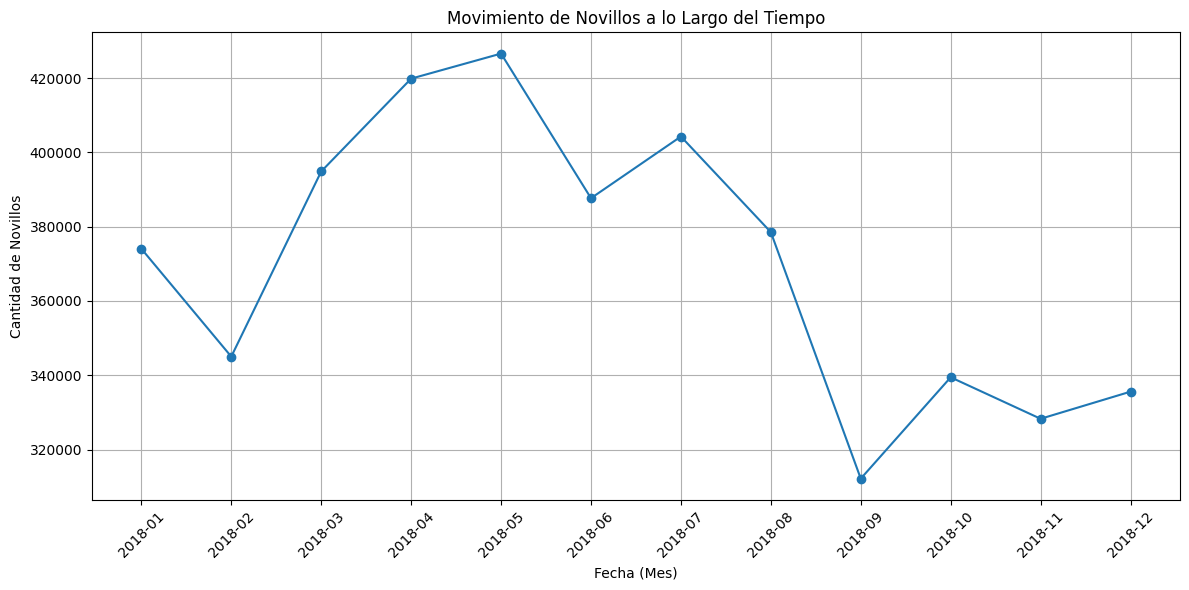

In [ ]:
#ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/novillo.csv'
#df_novillo = pd.read_csv(ruta_dataset, encoding='latin-1') # Changed line: Added encoding='latin-1'
# Convert 'fecha' column to datetime before using .dt accessor
df_novillo['fecha'] = pd.to_datetime(df_novillo['fecha'])

movimiento_mensual = df_novillo.groupby(df_novillo["fecha"].dt.to_period("M"))["novillo"].sum()
todos_los_meses = pd.period_range(start="2018-01", end="2018-12", freq="M")
movimiento_mensual = movimiento_mensual.reindex(todos_los_meses, fill_value=0)
movimiento_mensual.index = movimiento_mensual.index.astype(str)


plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Mes)")
plt.ylabel("Cantidad de Novillos")
plt.title("Movimiento de Novillos a lo Largo del Tiempo")
plt.grid(True)
plt.tight_layout()
plt.show()

##Encoding

###Conversión de variables temporales

In [ ]:
df_novillo['log_novillo'] = np.log1p(df_novillo['novillo'])
df_novillo['fecha'] = pd.to_datetime(df_novillo['fecha'])
df_novillo['mes'] = df_novillo['fecha'].dt.month
df_novillo['day'] = df_novillo['fecha'].dt.day_of_week + 1
df_novillo.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillo,log_novillo,mes,day
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,36,3.610918,1,1
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,126,4.844187,1,1
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,106,4.672829,1,1
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,726,6.588926,1,1
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,1,0.693147,1,1


###Conversión de variables categóricas

In [ ]:
df_novillo_encoded = df_novillo.copy()
df_novillo_encoded = df_novillo_encoded.drop(['fecha', 'novillo', 'provincia_origen', 'provincia_destino'], axis=1)
df_novillo_encoded.head()

,origen,destino,provincia_origen_id,provincia_destino_id,log_novillo,mes,day
0,Establecimiento,Establecimiento,6,6,3.610918,1,1
1,Establecimiento,Establecimiento,6,6,4.844187,1,1
2,Establecimiento,Establecimiento,6,6,4.672829,1,1
3,Establecimiento,Establecimiento,6,6,6.588926,1,1
4,Establecimiento,Establecimiento,6,6,0.693147,1,1


In [ ]:
df_novillo_encoded = pd.get_dummies(df_novillo_encoded, columns=['origen', 'destino', 'provincia_origen_id', 'provincia_destino_id'])
df_novillo_encoded.head()

,log_novillo,mes,day,origen_Establecimiento,origen_Remate feria,destino_Establecimiento,destino_Frigorífico,destino_Remate feria,provincia_origen_id_2,provincia_origen_id_6,...,provincia_destino_id_58,provincia_destino_id_62,provincia_destino_id_66,provincia_destino_id_70,provincia_destino_id_74,provincia_destino_id_78,provincia_destino_id_82,provincia_destino_id_86,provincia_destino_id_90,provincia_destino_id_94
0,3.610918,1,1,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4.844187,1,1,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,4.672829,1,1,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,6.588926,1,1,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.693147,1,1,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_novillo_encoded['log_novillo_scaled'] = scaler.fit_transform(df_novillo_encoded[['log_novillo']])


##K-mean

####Método del codo

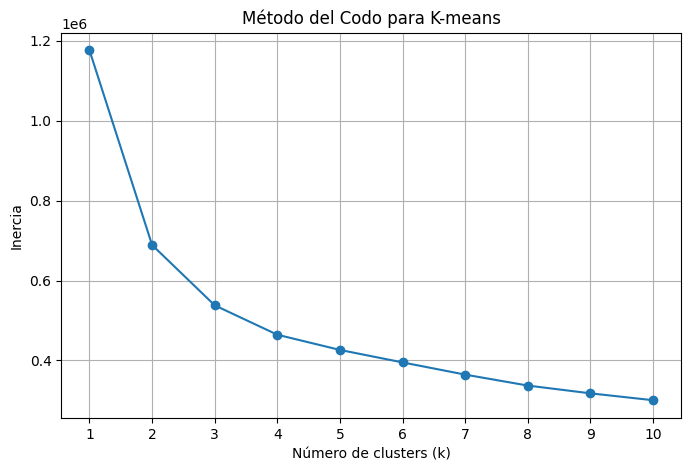

In [ ]:
X = df_novillo_encoded.values

inercia = []
K_values = range(1, 11)

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_values, inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(K_values)
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_novillo_encoded['cluster'] = kmeans.fit_predict(X)

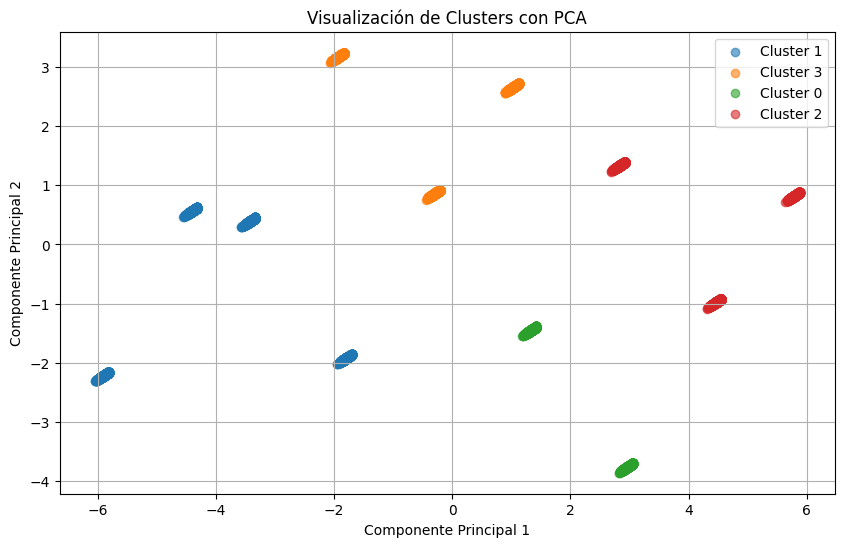

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_novillo_encoded['cluster']

plt.figure(figsize=(10,6))
for cluster_id in df_pca['cluster'].unique():
    cluster_data = df_pca[df_pca['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()


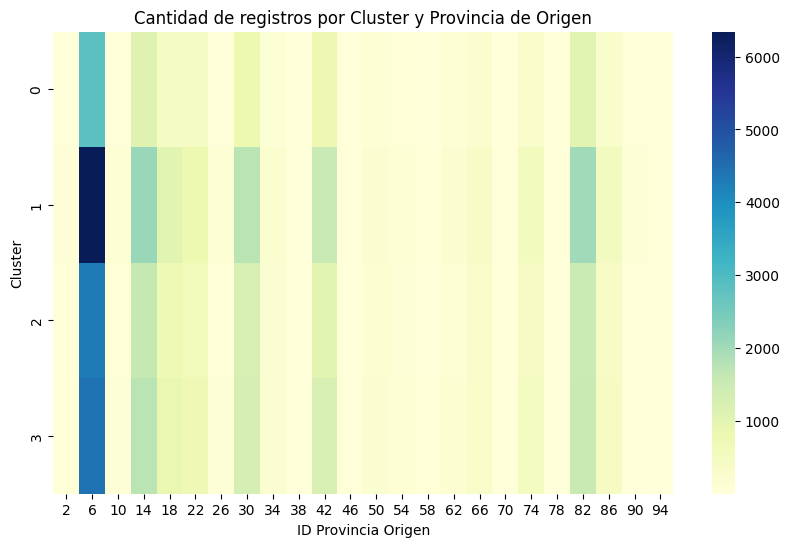

In [ ]:
provincia_origen_cluster = df_novillo.groupby(df_novillo_encoded['cluster'])['provincia_origen_id'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(provincia_origen_cluster, cmap='YlGnBu')
plt.title('Cantidad de registros por Cluster y Provincia de Origen')
plt.xlabel('ID Provincia Origen')
plt.ylabel('Cluster')
plt.show()


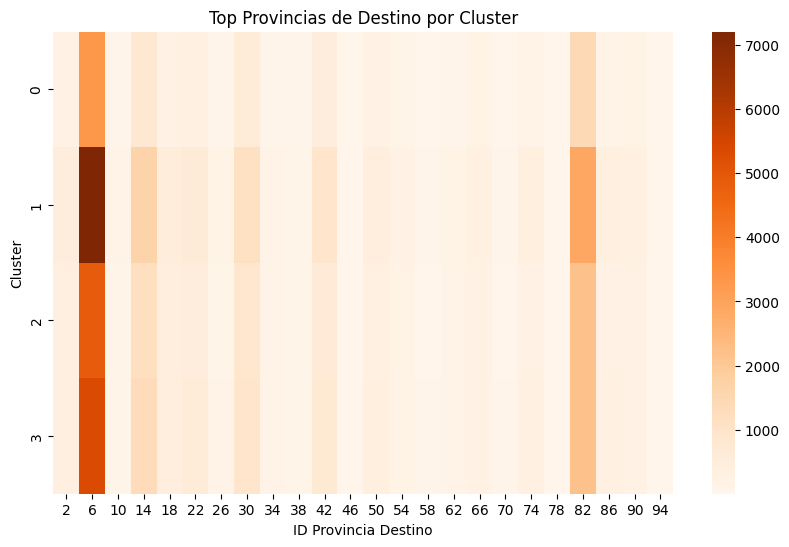

In [ ]:
provincia_destino_cluster = df_novillo.groupby(df_novillo_encoded['cluster'])['provincia_destino_id'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(provincia_destino_cluster, cmap='Oranges')
plt.title('Top Provincias de Destino por Cluster')
plt.xlabel('ID Provincia Destino')
plt.ylabel('Cluster')
plt.show()

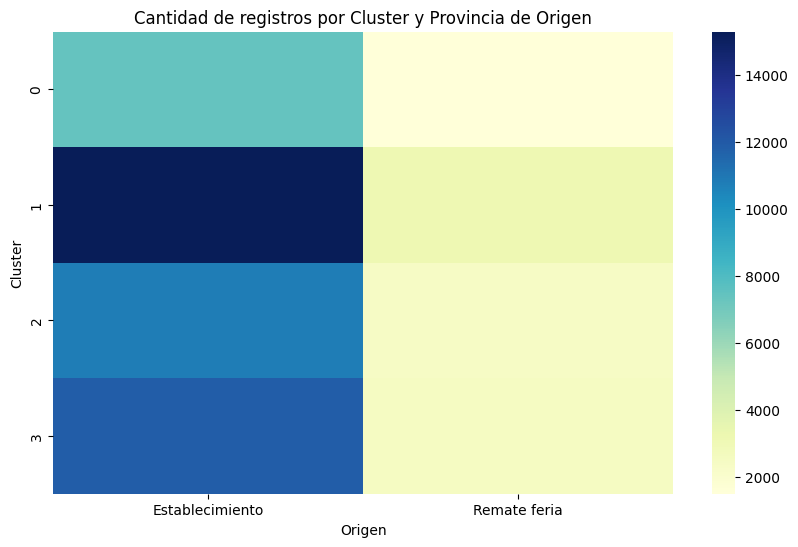

In [ ]:
origen_cluster = df_novillo.groupby(df_novillo_encoded['cluster'])['origen'].value_counts().unstack().fillna(0)

# Origen
plt.figure(figsize=(10,6))
sns.heatmap(origen_cluster, cmap='YlGnBu')
plt.title('Cantidad de registros por Cluster y Provincia de Origen')
plt.xlabel('Origen')
plt.ylabel('Cluster')
plt.show()

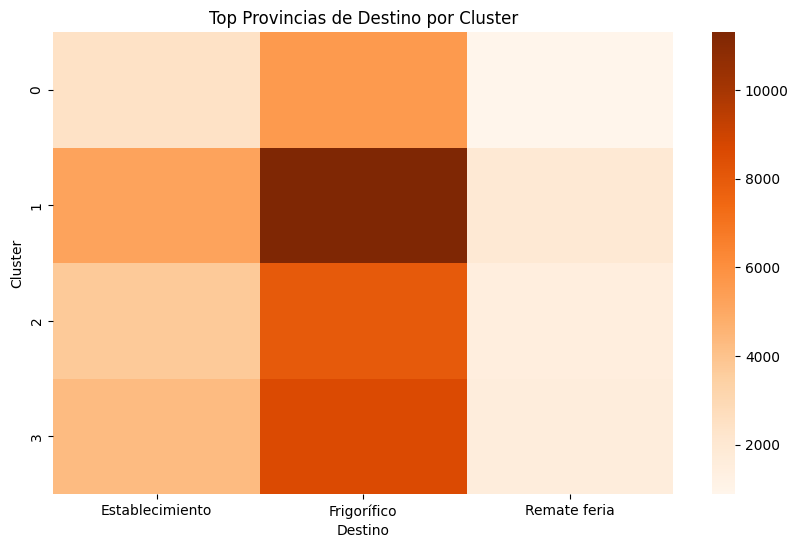

In [ ]:
destino_cluster = df_novillo.groupby(df_novillo_encoded['cluster'])['destino'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(destino_cluster, cmap='Oranges')
plt.title('Top Provincias de Destino por Cluster')
plt.xlabel('Destino')
plt.ylabel('Cluster')
plt.show()

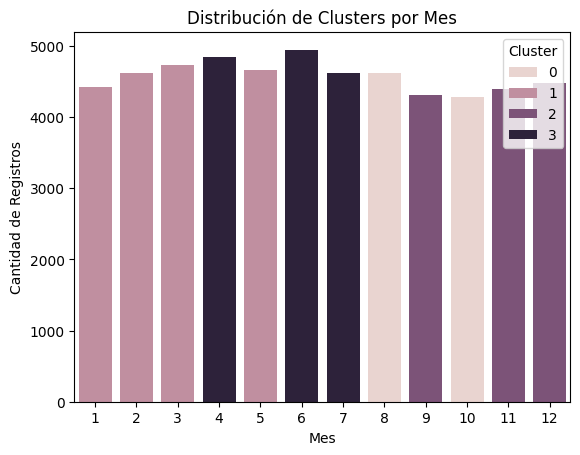

In [ ]:
sns.countplot(x='mes', hue='cluster', data=df_novillo_encoded)
plt.title('Distribución de Clusters por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Cluster')
plt.show()


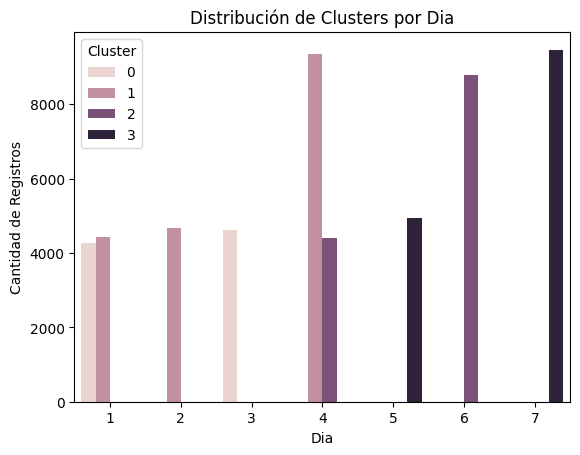

In [ ]:
sns.countplot(x='day', hue='cluster', data=df_novillo_encoded)
plt.title('Distribución de Clusters por Dia')
plt.xlabel('Dia')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Cluster')
plt.show()


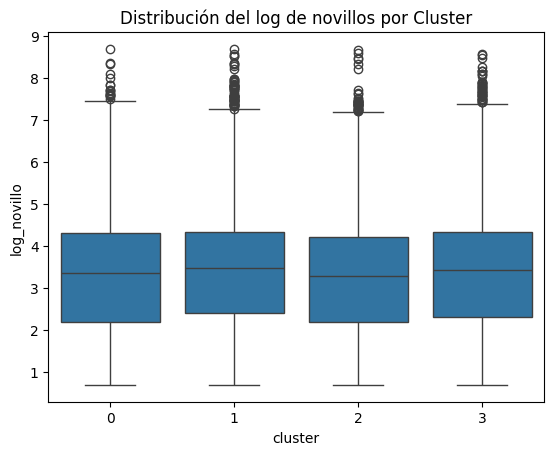

In [ ]:
sns.boxplot(x='cluster', y='log_novillo', data=df_novillo_encoded)
plt.title("Distribución del log de novillos por Cluster")
plt.show()

##DBSCAN

Primeramente se comenzó con un eps = 0.5, luego de realizar el ajuste de hiper parametros se utilizó eps = 1.4

In [ ]:
from sklearn.cluster import DBSCAN

df_novillo_encoded_dbscan = df_novillo_encoded.copy()
df_novillo_encoded_dbscan.drop('cluster', axis=1, inplace=True)

X = df_novillo_encoded_dbscan.values
dbscan = DBSCAN(eps=2.0, min_samples=5)
clusters = dbscan.fit_predict(X)


df_novillo_encoded_dbscan['cluster_dbscan'] = clusters


In [ ]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Clusters encontrados: {n_clusters}")
print(f"Registros considerados como ruido: {n_noise}")

Clusters encontrados: 11
Registros considerados como ruido: 12


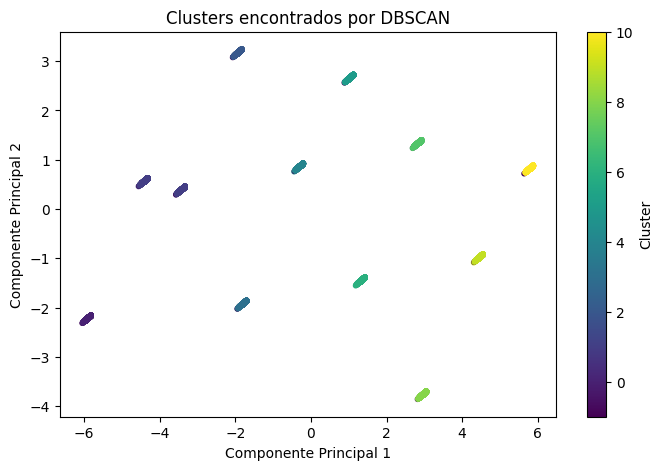

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('Clusters encontrados por DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
df_novillo.loc[df_novillo_encoded_dbscan.index].groupby(df_novillo_encoded_dbscan['cluster_dbscan'])['provincia_origen_id'].value_counts()

cluster_dbscan  provincia_origen_id
-1              66                       12
 0              6                      1644
                14                      494
                82                      482
                30                      406
                                       ... 
 10             38                        9
                58                        9
                78                        9
                70                        7
                94                        3
Name: count, Length: 265, dtype: int64

###Otimización de hiperparametros

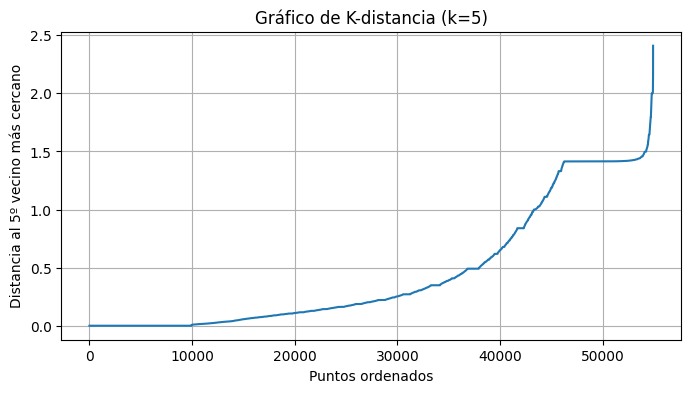

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('Gráfico de K-distancia (k=5)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5º vecino más cercano')
plt.grid(True)
plt.show()


###Analisis de los Clousters

In [ ]:
conteo_clusters = df_novillo_encoded_dbscan['cluster_dbscan'].value_counts().sort_values(ascending=False)
print(conteo_clusters)

cluster_dbscan
 1     9349
 4     4945
 2     4846
 3     4659
 5     4613
 6     4613
 10    4481
 0     4421
 9     4389
 7     4305
 8     4278
-1       12
Name: count, dtype: int64


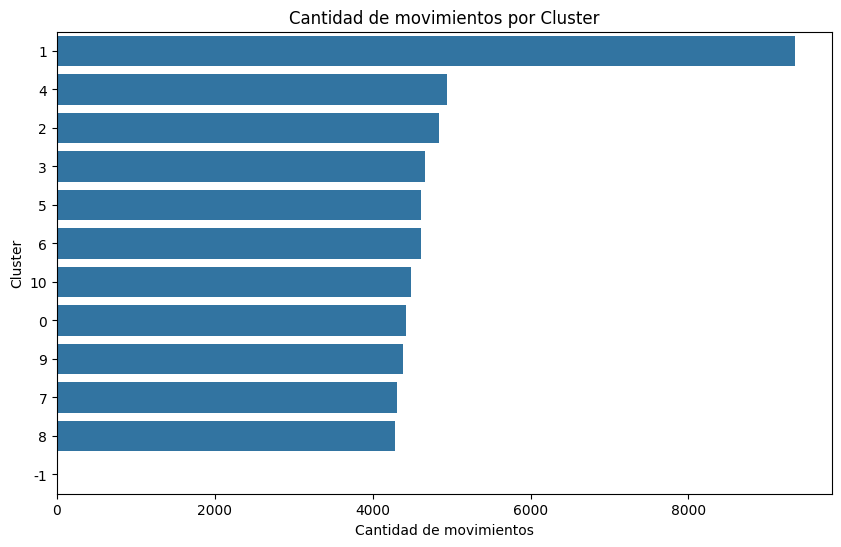

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_novillo_encoded_dbscan, y='cluster_dbscan', order=conteo_clusters.index)
plt.title("Cantidad de movimientos por Cluster")
plt.xlabel("Cantidad de movimientos")
plt.ylabel("Cluster")
plt.show()

Text(95.72222222222221, 0.5, 'Cluster')

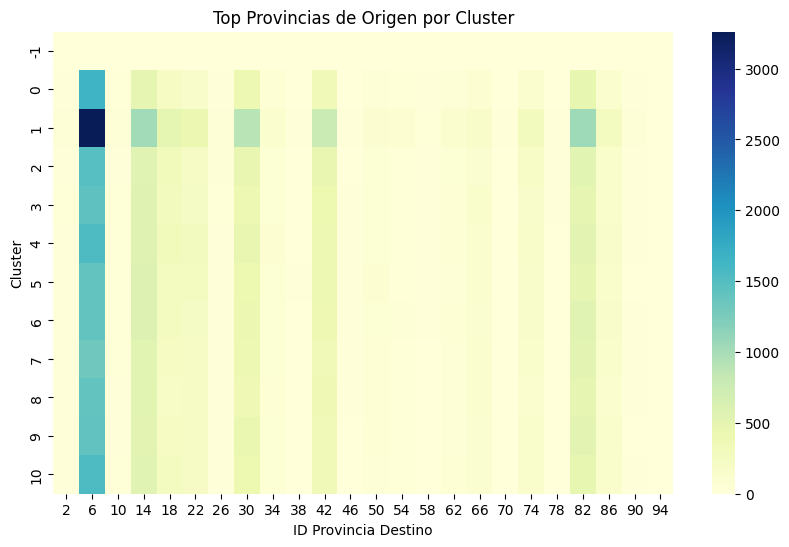

In [ ]:
provincia_origen_cluster = df_novillo.groupby(df_novillo_encoded_dbscan['cluster_dbscan'])['provincia_origen_id'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(provincia_origen_cluster, cmap='YlGnBu')
plt.title('Top Provincias de Origen por Cluster')
plt.xlabel('ID Provincia Destino')
plt.ylabel('Cluster')

Text(95.72222222222221, 0.5, 'Cluster')

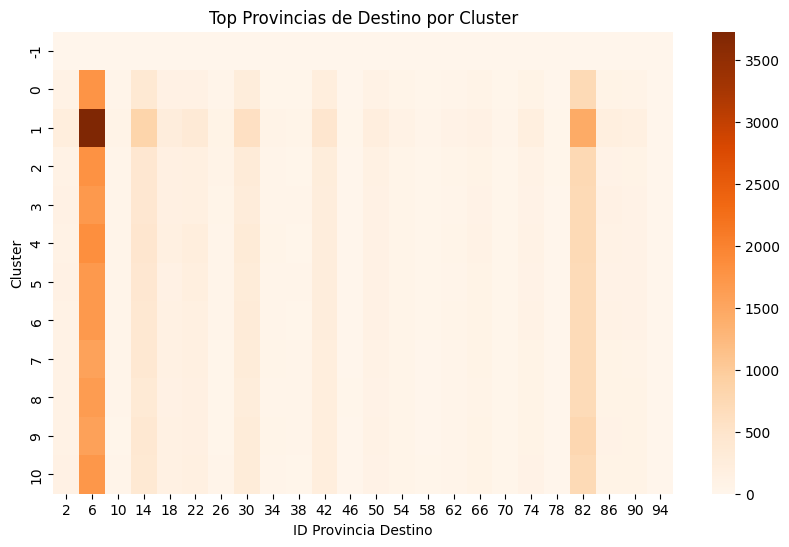

In [ ]:
provincia_destino_cluster = df_novillo.groupby(df_novillo_encoded_dbscan['cluster_dbscan'])['provincia_destino_id'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(provincia_destino_cluster, cmap='Oranges')
plt.title('Top Provincias de Destino por Cluster')
plt.xlabel('ID Provincia Destino')
plt.ylabel('Cluster')

Text(95.72222222222221, 0.5, 'Cluster')

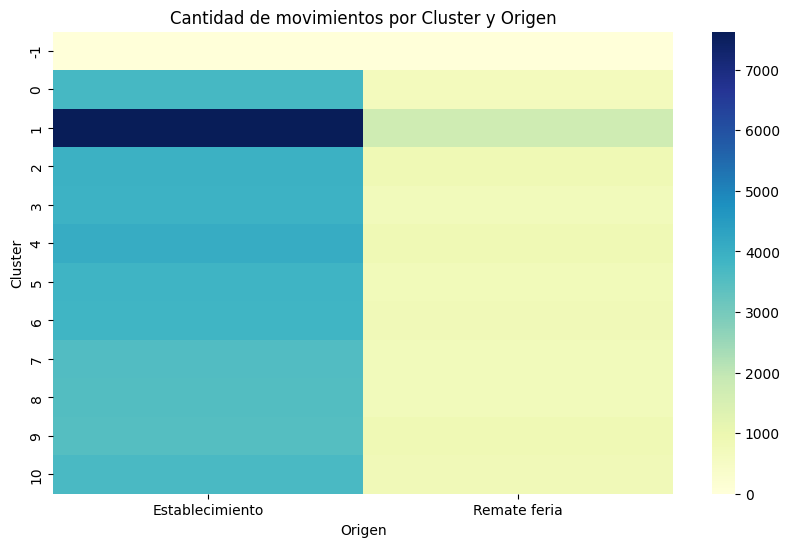

In [ ]:
origen_cluster = df_novillo.groupby(df_novillo_encoded_dbscan['cluster_dbscan'])['origen'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(origen_cluster, cmap='YlGnBu')
plt.title('Cantidad de movimientos por Cluster y Origen')
plt.xlabel('Origen')
plt.ylabel('Cluster')

Text(95.72222222222221, 0.5, 'Cluster')

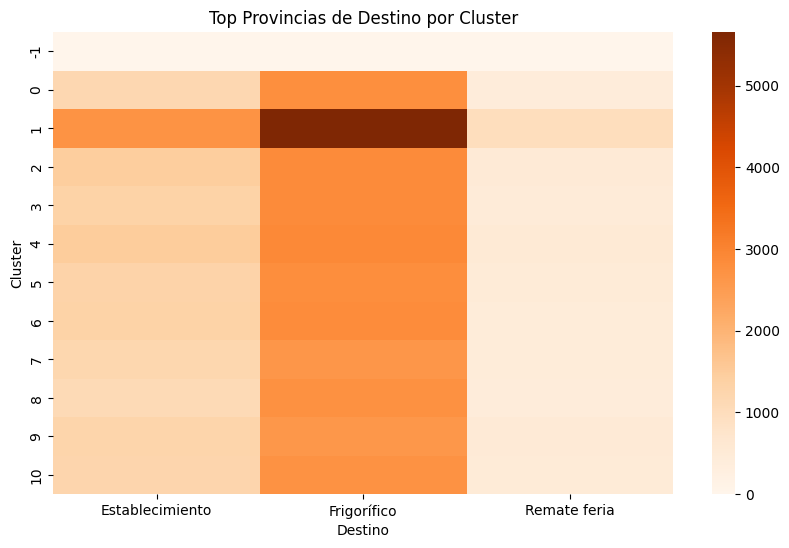

In [ ]:
destino_cluster = df_novillo.groupby(df_novillo_encoded_dbscan['cluster_dbscan'])['destino'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(destino_cluster, cmap='Oranges')
plt.title('Top Provincias de Destino por Cluster')
plt.xlabel('Destino')
plt.ylabel('Cluster')

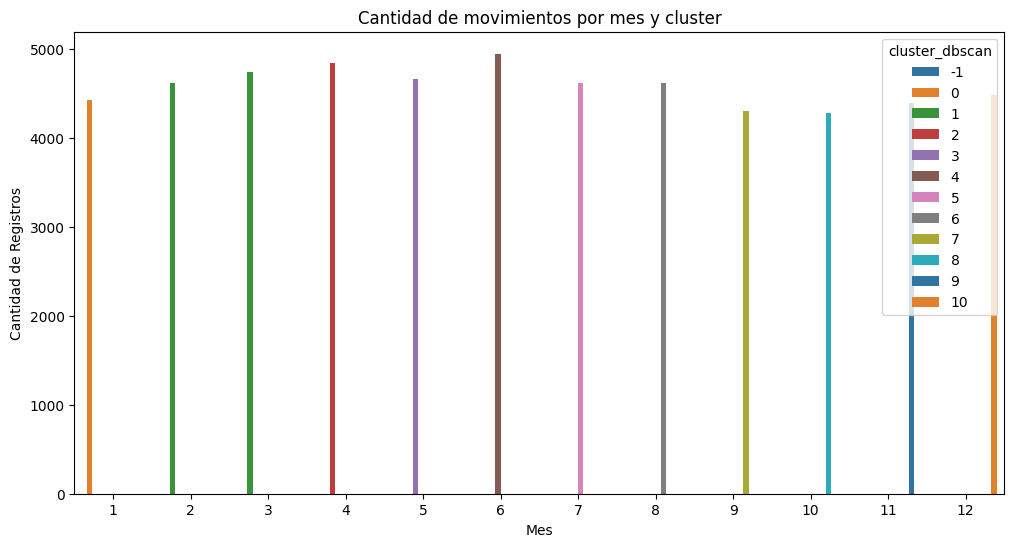

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_novillo_encoded_dbscan, x='mes', hue='cluster_dbscan', palette='tab10')
plt.title("Cantidad de movimientos por mes y cluster")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Registros")
plt.show()


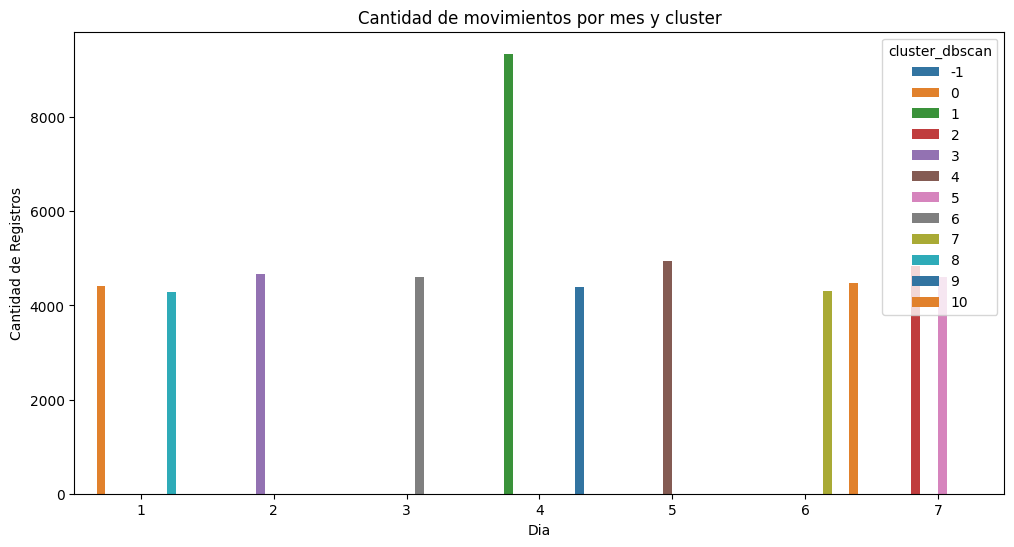

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_novillo_encoded_dbscan, x='day', hue='cluster_dbscan', palette='tab10')
plt.title("Cantidad de movimientos por mes y cluster")
plt.xlabel("Dia")
plt.ylabel("Cantidad de Registros")
plt.show()

##Elección del modelo

In [ ]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X, kmeans.labels_)
mask = dbscan.labels_ != -1
score_dbscan = silhouette_score(X[mask], dbscan.labels_[mask])

print(f"Silhouette Score (K-means): {score_kmeans}")
print(f"Silhouette Score (DBSCAN): {score_dbscan}")

Silhouette Score (K-means): 0.2792434793814988
Silhouette Score (DBSCAN): 0.25057535443597123


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(X, kmeans.labels_)
mask = dbscan.labels_ != -1
db_dbscan = davies_bouldin_score(X[mask], dbscan.labels_[mask])

print(f"Davies-Bouldin Index (K-means): {db_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {db_dbscan}")

Davies-Bouldin Index (K-means): 1.3639300312365152
Davies-Bouldin Index (DBSCAN): 1.7266301975753664


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_kmeans = calinski_harabasz_score(X, kmeans.labels_)
mask = dbscan.labels_ != -1
ch_dbscan = calinski_harabasz_score(X[mask], dbscan.labels_[mask])

print(f"Calinski-Harabasz Index (K-means): {ch_kmeans}")
print(f"Calinski-Harabasz Index (DBSCAN): {ch_dbscan}")

Calinski-Harabasz Index (K-means): 28036.60942458451
Calinski-Harabasz Index (DBSCAN): 15305.842851676203


#Novillito

In [ ]:
ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/novillito.csv'
df_novillito = pd.read_csv(ruta_dataset,encoding='utf-8')
df_novillito.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillito
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,342
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,6
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,38
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,2
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,10


###Analisis de la distribución de la variable Novillito

In [ ]:
df_novillito['novillito'].describe()

,novillito
count,73588.000000
mean,85.797807
std,213.451530
min,1.000000
25%,12.000000
50%,34.000000
75%,80.000000
max,8264.000000


CV > 1: Indica una
alta variabilidad relativa.
Los datos están
bastante dispersos en
comparación con la
media.

In [ ]:
cv = df_novillito['novillito'].std() / df_novillito['novillito'].mean()
print(f'Coeficiente de variación: {cv:.2f}')


Coeficiente de variación: 2.49


In [ ]:
Q1 = df_novillito['novillito'].quantile(0.25)
Q3 = df_novillito['novillito'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_novillito[(df_novillito['novillito'] < Q1 - 1.5 * IQR) | (df_novillito['novillito'] > Q3 + 1.5 * IQR)]
print(f'Total de outliers: {outliers.shape[0]}')


Total de outliers: 7681


In [ ]:
asimetria = df_novillito['novillito'].skew()
print(f'Asimetría: {asimetria:.2f}')

Asimetría: 13.13


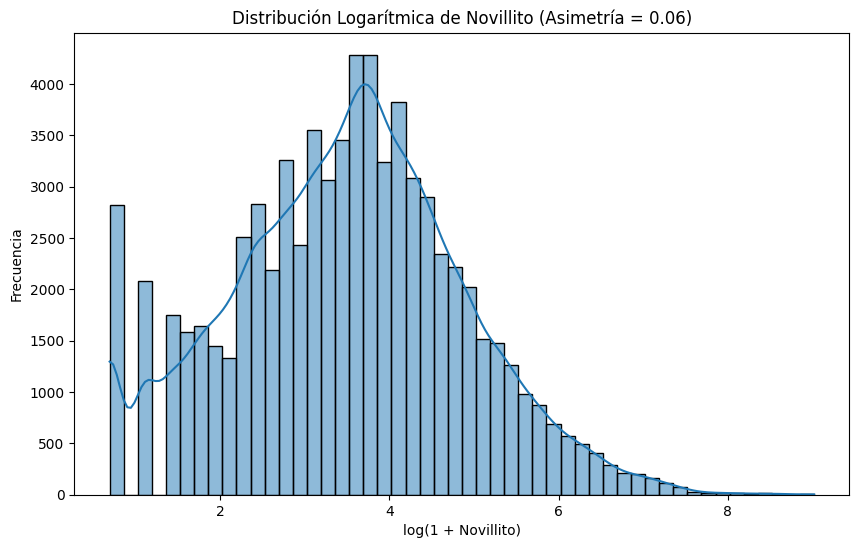

In [ ]:
df_novillito['log_novillito'] = np.log1p(df_novillito['novillito'])
asimetria_log = df_novillito['log_novillito'].skew()
plt.figure(figsize=(10,6))
sns.histplot(df_novillito['log_novillito'], kde=True, bins=50)
plt.title(f'Distribución Logarítmica de Novillito (Asimetría = {asimetria_log:.2f})')
plt.xlabel('log(1 + Novillito)')
plt.ylabel('Frecuencia')
plt.show()


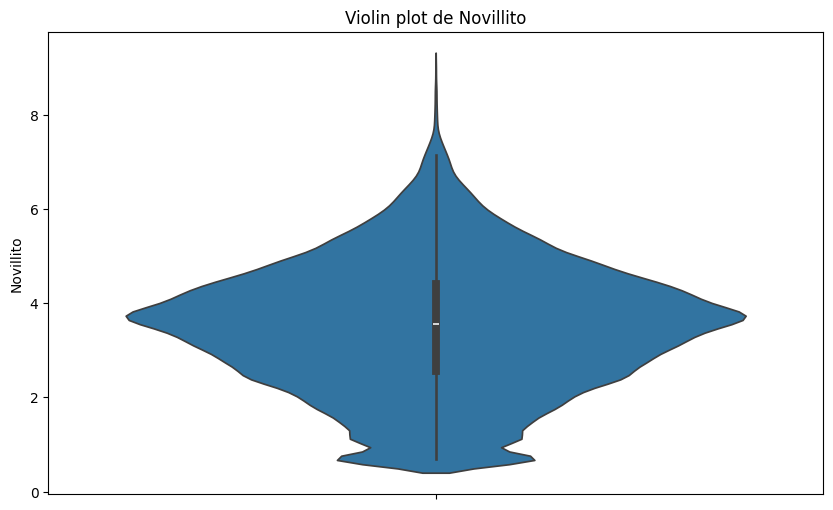

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='log_novillito', data=df_novillito)
plt.title('Violin plot de Novillito')
plt.ylabel('Novillito')
plt.show()


In [ ]:
df_novillito.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,novillito,log_novillito
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,342,5.837730
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,6,1.945910
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,38,3.663562
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,2,1.098612
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,10,2.397895


Observaciones

*El hecho de que la media (85) esté muy por encima de la mediana (34) indica que hay una gran asimetría positiva (hacia la derecha).

*El coeficiente de variación (std / media = 2.49) confirma que hay alta dispersión relativa.

*El número de outliers (7681) es importante: alrededor del 11% del total (735887 registros).


Al momento de aplicar modelos de machine learning se utilizará la transformación logaritmica.

###Analisis de la distribución de la variable novillito con respecto a las provicias de origen y destino.

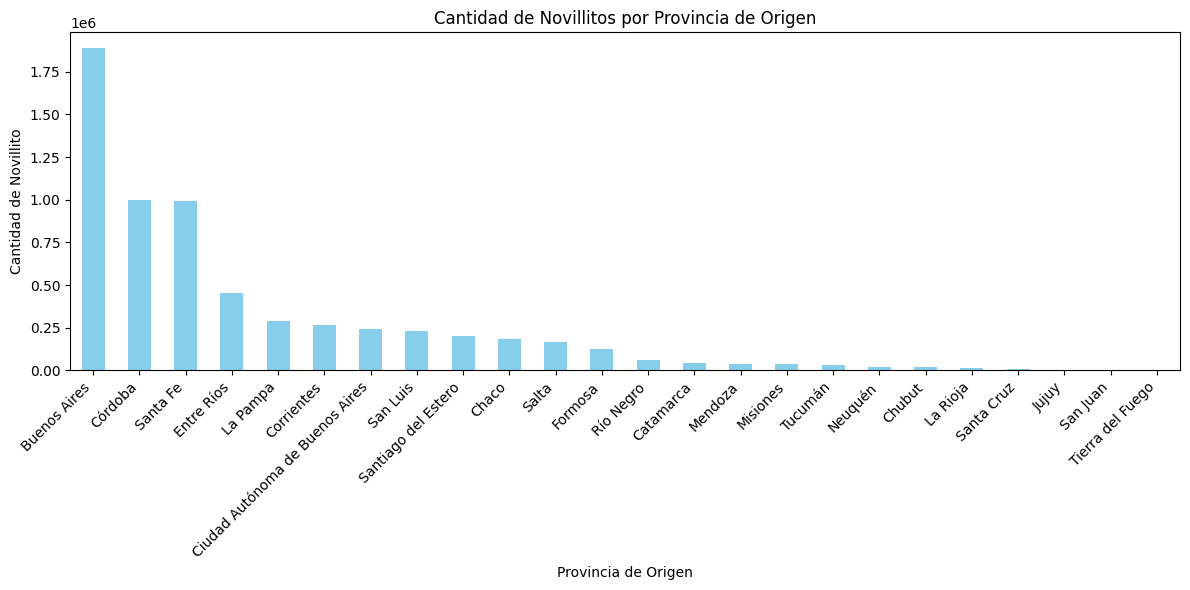

In [ ]:
novillito_por_provincia = df_novillito.groupby('provincia_origen')['novillito'].sum()
novillito_por_provincia = novillito_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
novillito_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Novillitos por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Novillito')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

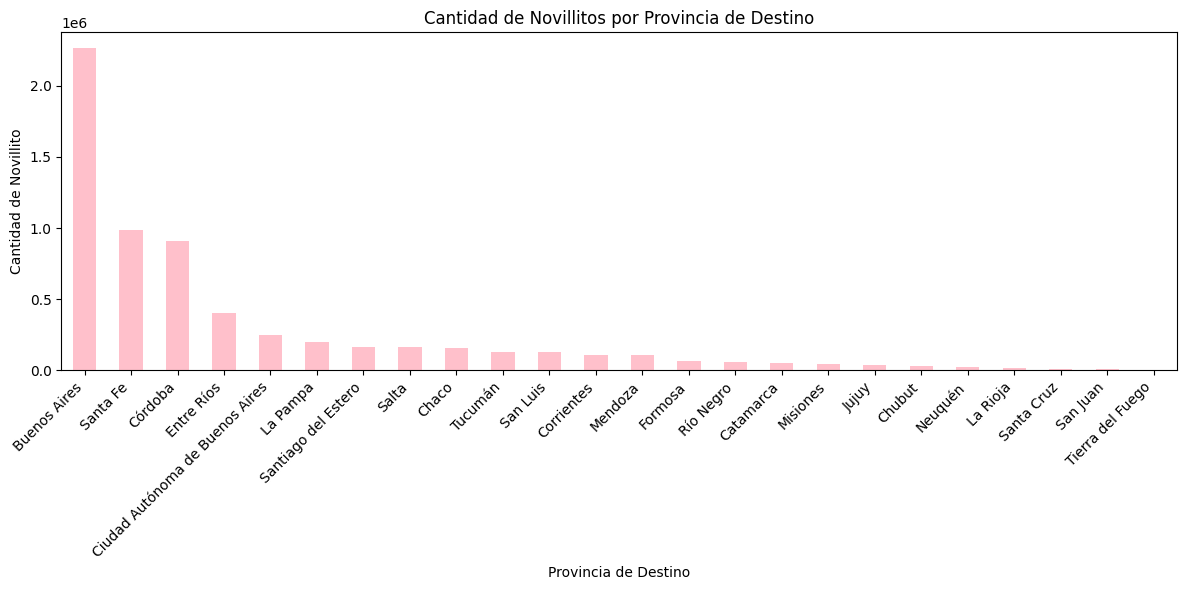

In [ ]:
novillito_por_provincia = df_novillito.groupby('provincia_destino')['novillito'].sum()
novillito_por_provincia = novillito_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
novillito_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Novillitos por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Novillito')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Analisis de la distribución de la variable novillito con respecto al origen y el destino

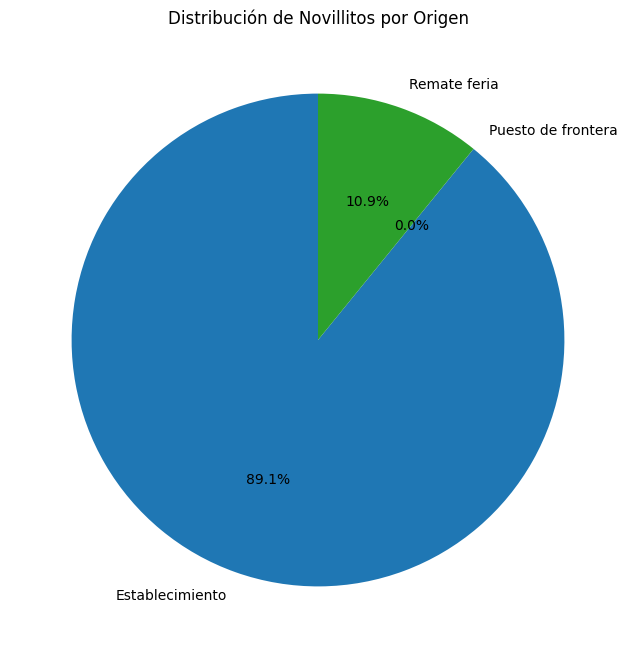

In [ ]:
origen_novillito = df_novillito.groupby("origen")["novillito"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillito, labels=origen_novillito.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillitos por Origen")
plt.show()

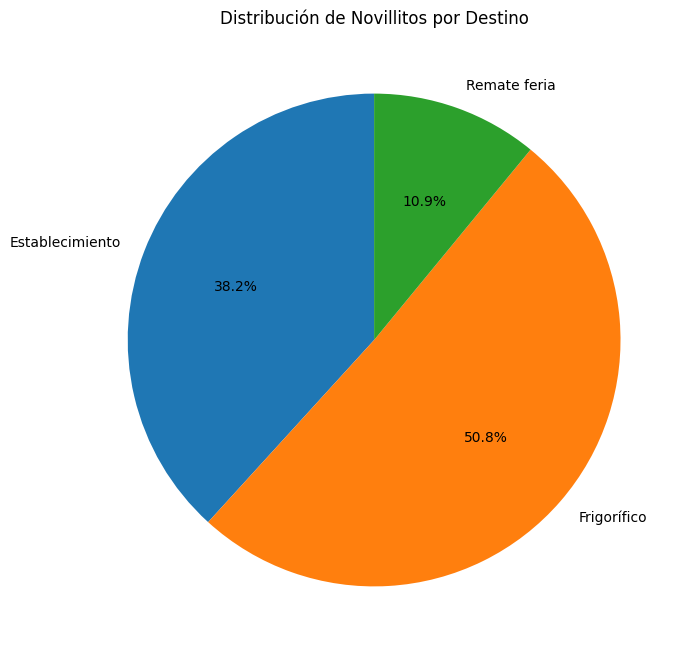

In [ ]:
origen_novillito = df_novillito.groupby("destino")["novillito"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillito, labels=origen_novillito.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillitos por Destino")
plt.show()

El 89% de los novillitos provienen de un establecimiento y el resto de los remates. Pero en este caso el 50% tiene como destino el frigorifico, el 38% otros establecimientos y el resto va a remate.

###Analisis de la distribución de la variable novillito con respecto a la fecha

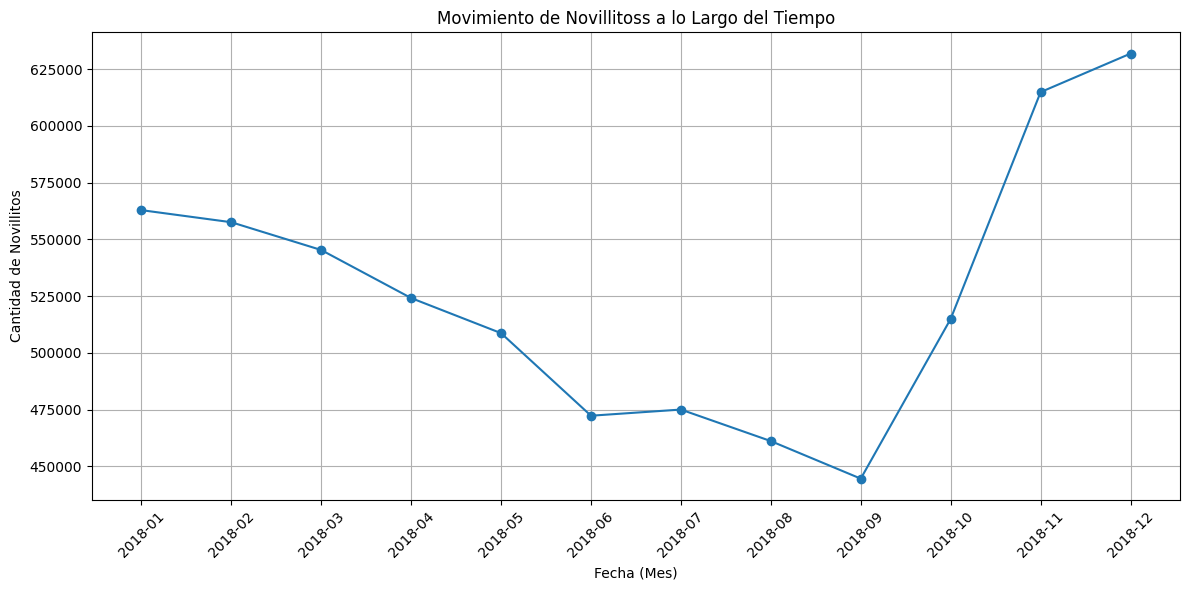

In [ ]:
# ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/novillito.csv'
# df_novillito = pd.read_csv(ruta_dataset, encoding='latin-1') # Changed line: Added encoding='latin-1'
# df_novillito.head()

# # Convert 'fecha' column to datetime before using .dt accessor
df_novillito['fecha'] = pd.to_datetime(df_novillito['fecha'])

movimiento_mensual = df_novillito.groupby(df_novillito["fecha"].dt.to_period("M"))["novillito"].sum()
todos_los_meses = pd.period_range(start="2018-01", end="2018-12", freq="M")
movimiento_mensual = movimiento_mensual.reindex(todos_los_meses, fill_value=0)
movimiento_mensual.index = movimiento_mensual.index.astype(str)


plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Mes)")
plt.ylabel("Cantidad de Novillitos")
plt.title("Movimiento de Novillitoss a lo Largo del Tiempo")
plt.grid(True)
plt.tight_layout()
plt.show()

#Ternero

In [ ]:
ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/ternero.csv'
df_ternero = pd.read_csv(ruta_dataset, encoding='utf-8')
df_ternero.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,provincia_destino,provincia_destino_id,ternero
0,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,931
1,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,96
2,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,31
3,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,29
4,2018-01-01 01:00:00,Establecimiento,Establecimiento,Buenos Aires,6,Buenos Aires,6,11


###Analisis de la distribución de la variable Ternero

In [ ]:
df_ternero['ternero'].describe()

,ternero
count,74100.000000
mean,97.083968
std,210.986372
min,1.000000
25%,15.000000
50%,41.000000
75%,97.000000
max,6583.000000


In [ ]:
cv = df_ternero['ternero'].std() / df_ternero['ternero'].mean()
print(f'Coeficiente de variación: {cv:.2f}')

Coeficiente de variación: 2.17


In [ ]:
Q1 = df_ternero['ternero'].quantile(0.25)
Q3 = df_ternero['ternero'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_ternero[(df_ternero['ternero'] < Q1 - 1.5 * IQR) | (df_ternero['ternero'] > Q3 + 1.5 * IQR)]
print(f'Total de outliers: {outliers.shape[0]}')


Total de outliers: 7033


In [ ]:
asimetria = df_ternero['ternero'].skew()
print(f'Asimetría: {asimetria:.2f}')

Asimetría: 8.60


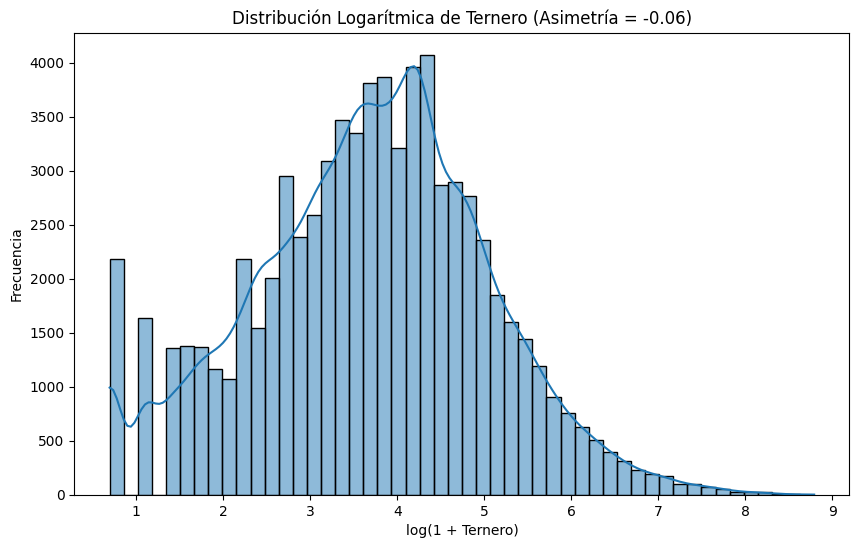

In [ ]:
df_ternero['log_ternero'] = np.log1p(df_ternero['ternero'])
asimetria_log = df_ternero['log_ternero'].skew()
plt.figure(figsize=(10,6))
sns.histplot(df_ternero['log_ternero'], kde=True, bins=50)
plt.title(f'Distribución Logarítmica de Ternero (Asimetría = {asimetria_log:.2f})')
plt.xlabel('log(1 + Ternero)')
plt.ylabel('Frecuencia')
plt.show()


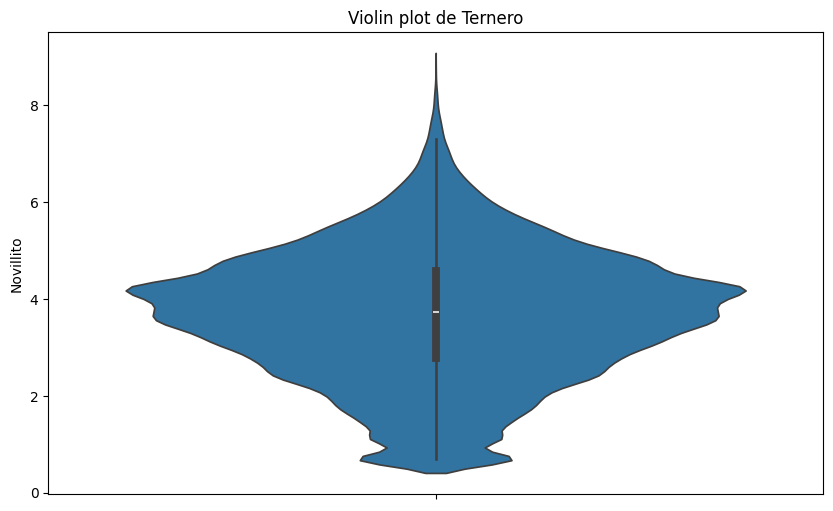

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='log_ternero', data=df_ternero)
plt.title('Violin plot de Ternero')
plt.ylabel('Novillito')
plt.show()

Observaciones

*El hecho de que la media (97) esté muy por encima de la mediana (41) indica que hay una gran asimetría positiva (hacia la derecha).

*El coeficiente de variación (std / media = 2.17) confirma que hay alta dispersión relativa.

*El número de outliers (7033) es importante: alrededor del 9% del total (74100 registros).


Al momento de aplicar modelos de machine learning se utilizará la transformación logaritmica.

###Analisis de la distribución de la variable ternero con respecto a las provicias de origen y destino.

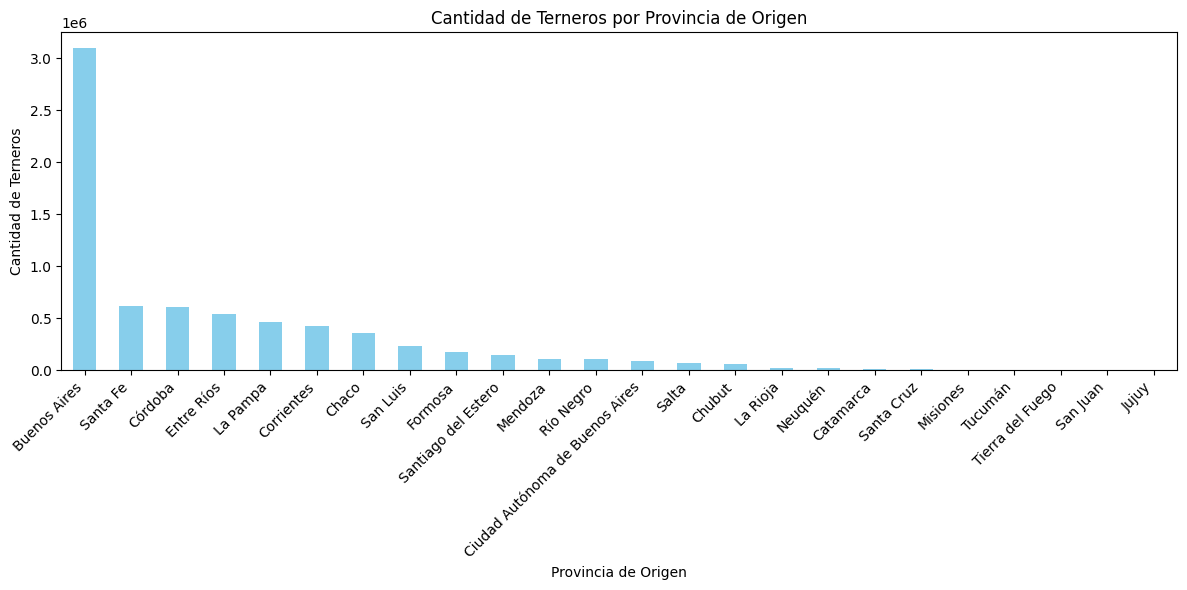

In [ ]:
terneros_por_provincia = df_ternero.groupby('provincia_origen')['ternero'].sum()
terneros_por_provincia = terneros_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Terneros por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Terneros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


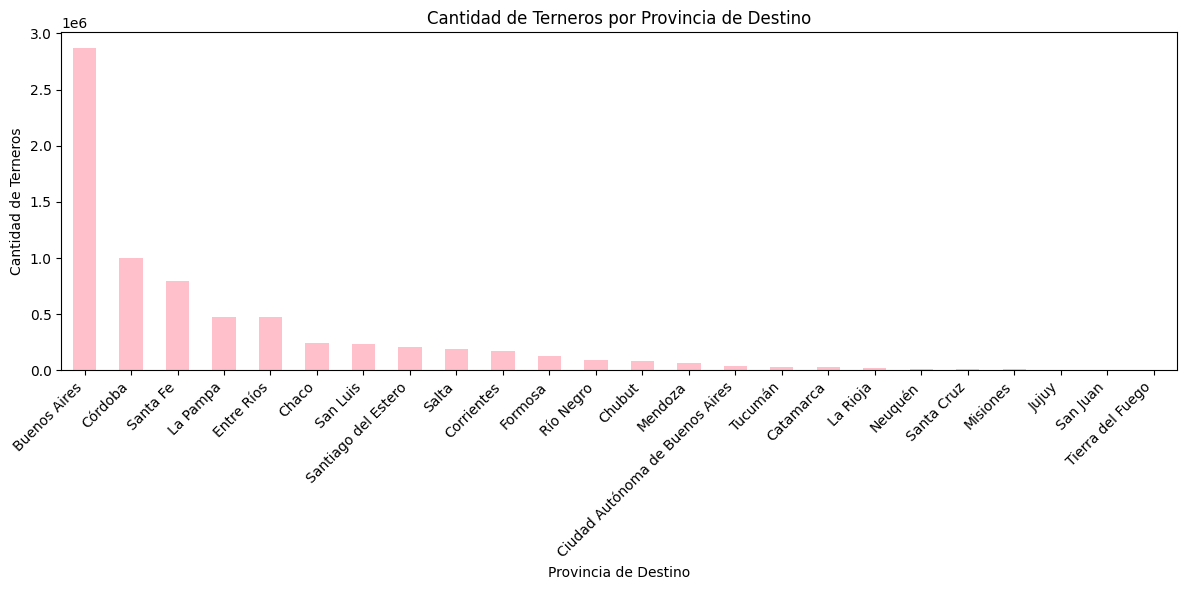

In [ ]:
terneros_por_provincia = df_ternero.groupby('provincia_destino')['ternero'].sum()
terneros_por_provincia = terneros_por_provincia.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Terneros por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Terneros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Analisis de la distribución de la variable ternero con respecto al origen y el destino

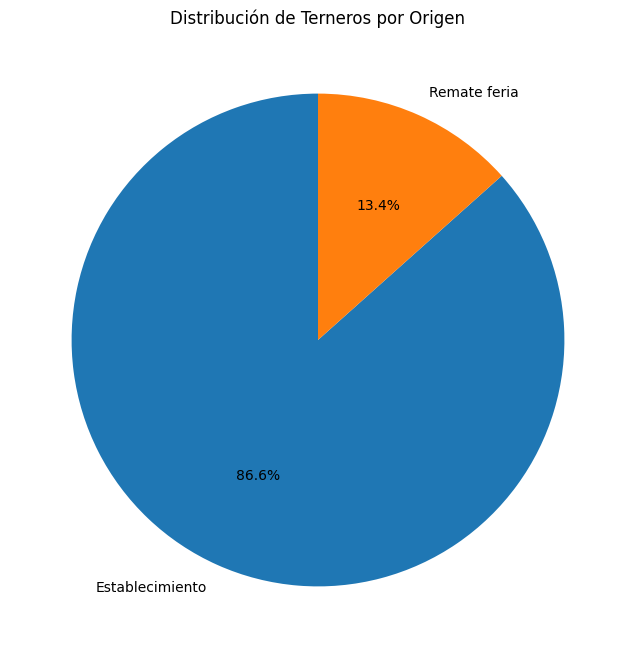

In [ ]:
origen_terneros = df_ternero.groupby("origen")["ternero"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_terneros, labels=origen_terneros.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Terneros por Origen")
plt.show()

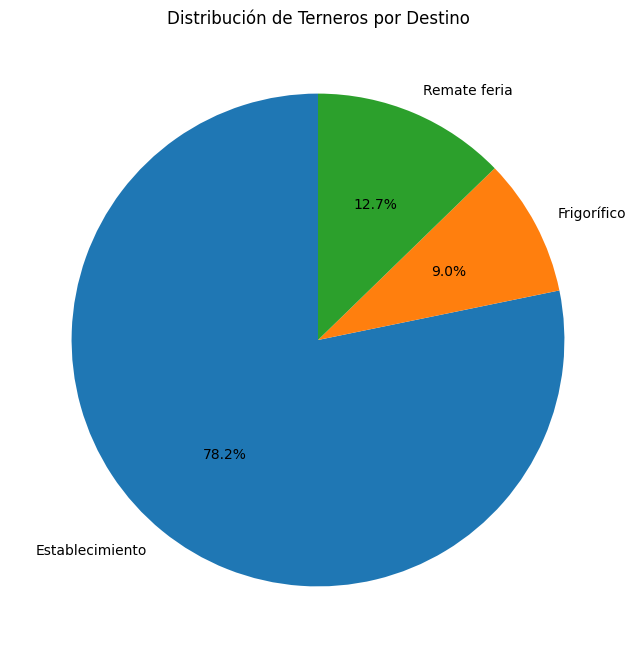

In [ ]:
destino_terneros = df_ternero.groupby("destino")["ternero"].sum()

plt.figure(figsize=(8, 8))
plt.pie(destino_terneros, labels=destino_terneros.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Terneros por Destino")
plt.show()

En el caso de los terneros el mayor porcentaje de movimientos se da entre establecimientos y en menor porcentaje en remates. Menos del 10% tienen como destino el frigorifico.

###Analisis de la distribución de la variable ternero con respecto a la fecha

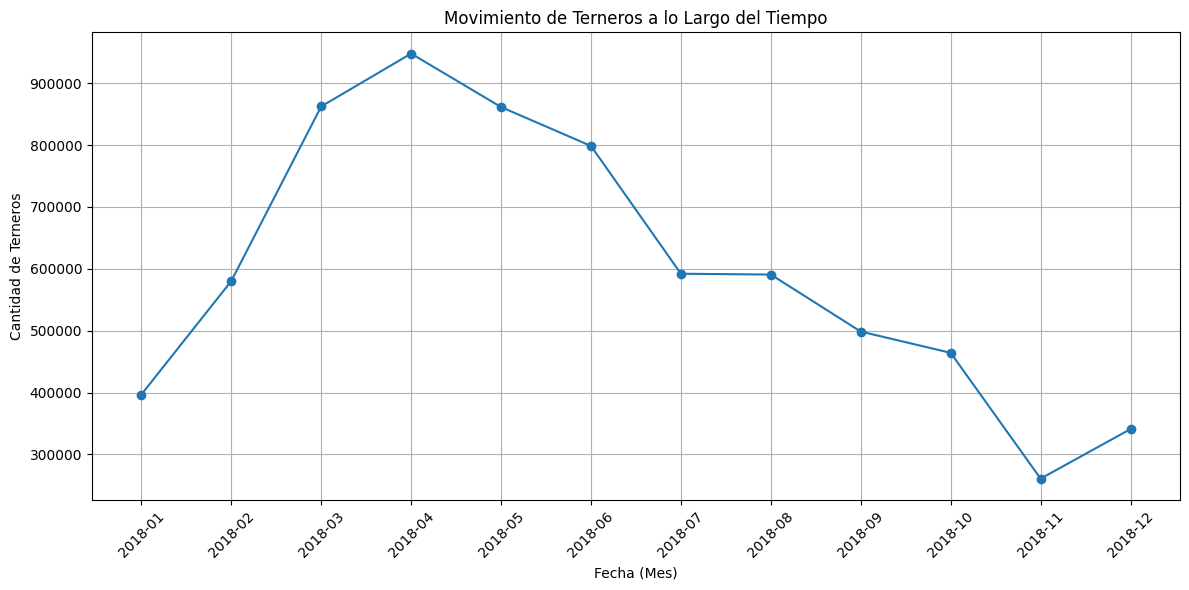

In [ ]:
# ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/ternero.csv'
# df_ternero = pd.read_csv(ruta_dataset, encoding='latin-1') # Changed line: Added encoding='latin-1'
# df_ternero.head()

# # Convert 'fecha' column to datetime before using .dt accessor
df_ternero['fecha'] = pd.to_datetime(df_ternero['fecha'])

movimiento_mensual = df_ternero.groupby(df_ternero["fecha"].dt.to_period("M"))["ternero"].sum()
todos_los_meses = pd.period_range(start="2018-01", end="2018-12", freq="M")
movimiento_mensual = movimiento_mensual.reindex(todos_los_meses, fill_value=0)
movimiento_mensual.index = movimiento_mensual.index.astype(str)


plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Mes)")
plt.ylabel("Cantidad de Terneros")
plt.title("Movimiento de Terneros a lo Largo del Tiempo")
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusiones y Hallazgos


##Identificación de patrones de compra y venta por región
Se ha identificado que la Provincia de Buenos Aires se destaca como el principal centro de concentración de terneros, novillos y novillitos.

##Características de los movimientos del ganado
* Terneros:
** Mayormente trasladados entre establecimientos (~90%), con un porcentaje mucho menor destinado a remates.
** Solo menos del 10% tienen como destino un frigorífico.

* Novillos:
** 92% provienen de establecimientos y el resto de remates.
** La mayoría (72%) tienen como destino frigoríficos.
** Un 19% se traslada entre establecimientos, y el resto se comercializa en remates.
* Novillitos:
** 89% provienen de establecimientos, con una proporción menor proveniente de remates.
** En este caso, el 50% tiene como destino el frigorífico, mientras que el 38% es trasladado a otros establecimientos antes de su venta final.

## Factores geográficos y su influencia en los grupos de regiones
Se observa que las provicias con climas cálidos y con presencia de pasturas tienden a concentrar una mayor cantidad de movimientos de animales.

##Estacionalidad en los movimientos de ganado
Se han identificado patrones estacionales en los movimientos de cada categoría:

* Terneros: Mayor cantidad de traslados en abril, mientras que el mínimo ocurre en noviembre.
* Novillos:  Mayor cantidad de traslados en mayo, hay una caida en junio y vuelve a tener otro pico en julio, mientras que el mínimo ocurre en noviembre.
* Novillitos: Máximo movimiento en diciembre, con un mínimo en septiembre.

Estos picos pueden estar asociados a factores como ciclos productivos, condiciones climáticas y demanda del mercado cárnico en distintos momentos del año.

##Regiones con mayor concentración
En el analisis se observó que existen una provicia con mayor movimiento de ganado con especto al resto: La Provincia de Buenos Aires.